In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
import taxis
from utils import *
from visualize import *
from sklearn.linear_model import *



In [2]:
DBNAME="taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952
x,y = get_grid_cell(LAT,LON,20)
x1,y1 = get_grid_cell(LAT1,LON1,20)
print x,y
print x1,y1
    
def getdf(data):
    df=pd.DataFrame(data)
    df.columns=['Time','X','Y','TaxiCount']
    df.index.name='Point'
    df.reset_index(level=0, inplace=True)
    return df

24 12
20 5


In [3]:
data=taxis.fetch_loc_by_date('taxis.db','20170624',LAT,LON)
data.extend(taxis.fetch_loc_by_date('taxis.db','20170625',LAT,LON))
data.extend(taxis.fetch_loc_by_date('taxis.db','20170626',LAT,LON))
data.extend(taxis.fetch_loc_by_date('taxis.db','20170627',LAT,LON))
data.extend(taxis.fetch_loc_by_date('taxis.db','20170628',LAT,LON))

df=getdf(data)
df.head()

,Point,Time,X,Y,TaxiCount
0,0,0900,24,12,28
1,1,0905,24,12,37
2,2,0910,24,12,34
3,3,0915,24,12,35
4,4,0920,24,12,37


In [5]:
plot_data([(df['Point'].tolist(),df['TaxiCount'].tolist())])

SyntaxError: unexpected EOF while parsing (<ipython-input-5-a128390393fe>, line 1)

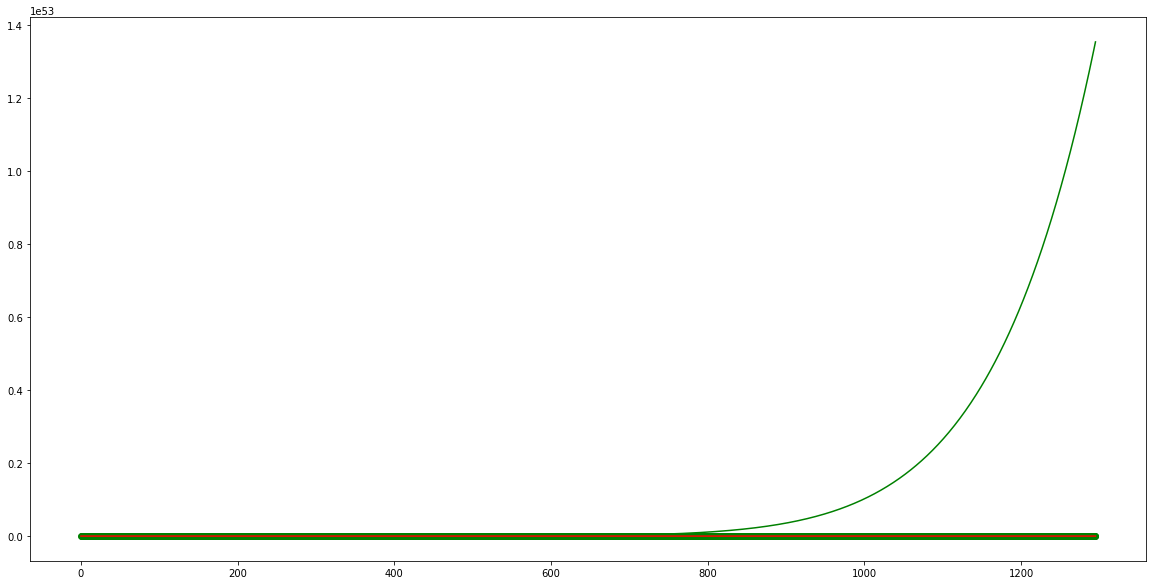

[132337296132715648145572570846917397910717403943141376L, 133365153471919814248113540041697930048757432361943040L, 134400190225017161936462301157344469062255186584535040L, 135442450932594584184482829219812404079838413425999872L]
      Point  Time   X   Y  TaxiCount
1291   1291  2150  24  12         46
1292   1292  2155  24  12         49
1293   1293  2200  24  12         48
1294   1294  2205  24  12         42
1295   1295  2210  24  12         36


In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([('poly', PolynomialFeatures(degree=10,include_bias=True)),
                  ('ridge', RidgeCV(alphas=[0.001,0.002,0.003],fit_intercept=False))])

X=df['Point'].as_matrix()
y=df['TaxiCount'].as_matrix()

X=X.reshape(-1,1)

model.fit(X,y)

plot(X,y,model)

X_predict=np.array([1292,1293,1294,1295]).reshape(-1,1)


print [int(x) for x in model.predict(X_predict)]

print df.tail()